# 1.Importing laibraries

In [57]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# 2. Load the dataset

In [58]:
df=pd.read_csv(r"D:/assign/abalone.csv")

In [59]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [60]:
df['age'] = df['Rings']+1.5
df = df.drop('Rings', axis = 1)

# 3.1.Univariate Analysis

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

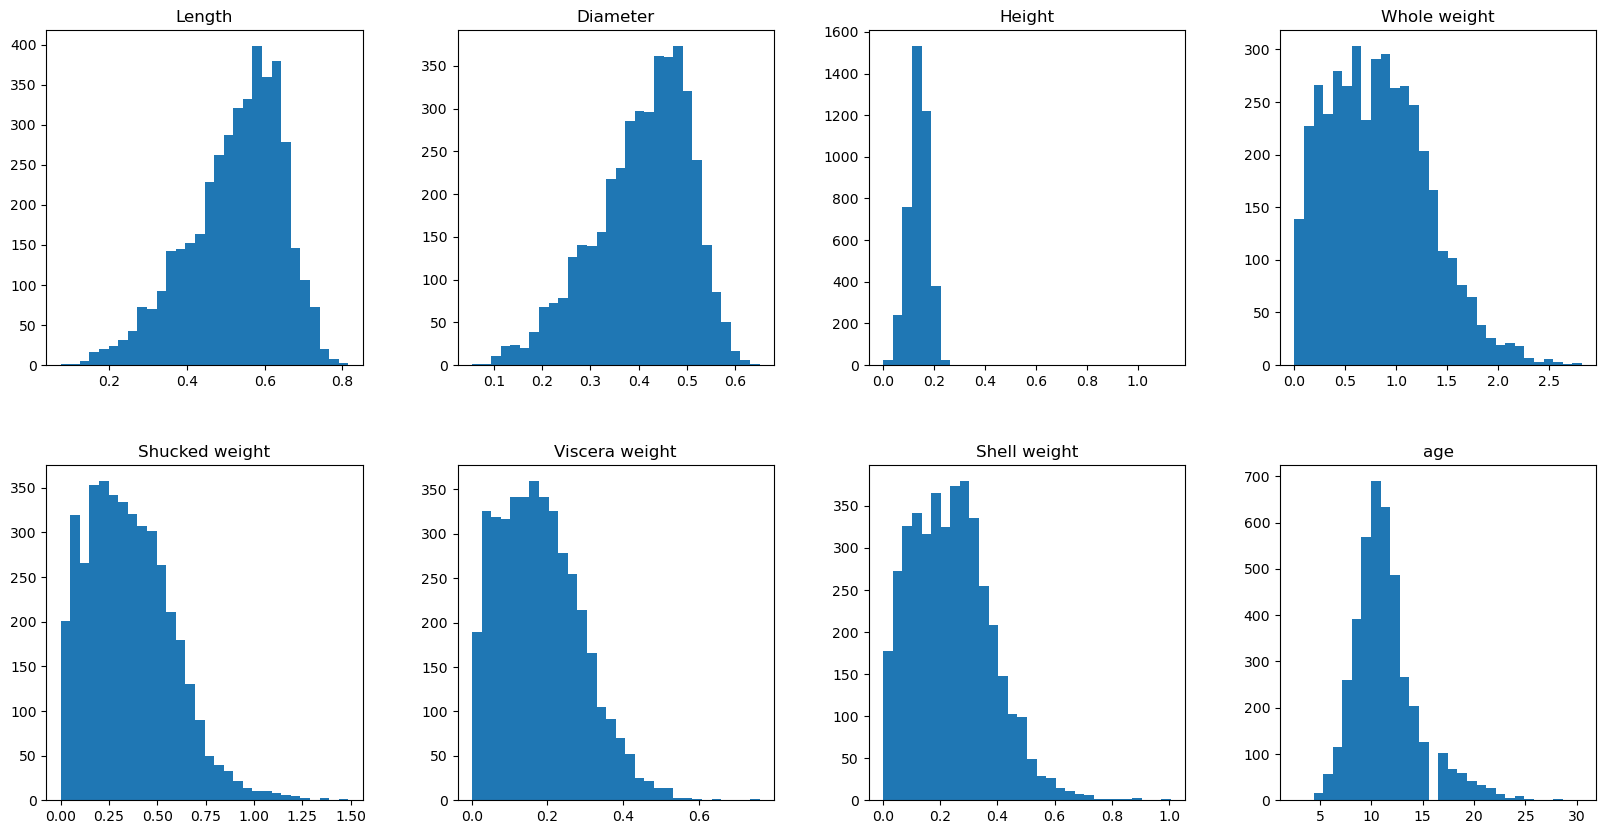

In [61]:
df.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

In [62]:
df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age']].mean().sort_values('age')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


# 3.2.Bi-Variate Analysis & Multi-Variate Analysis

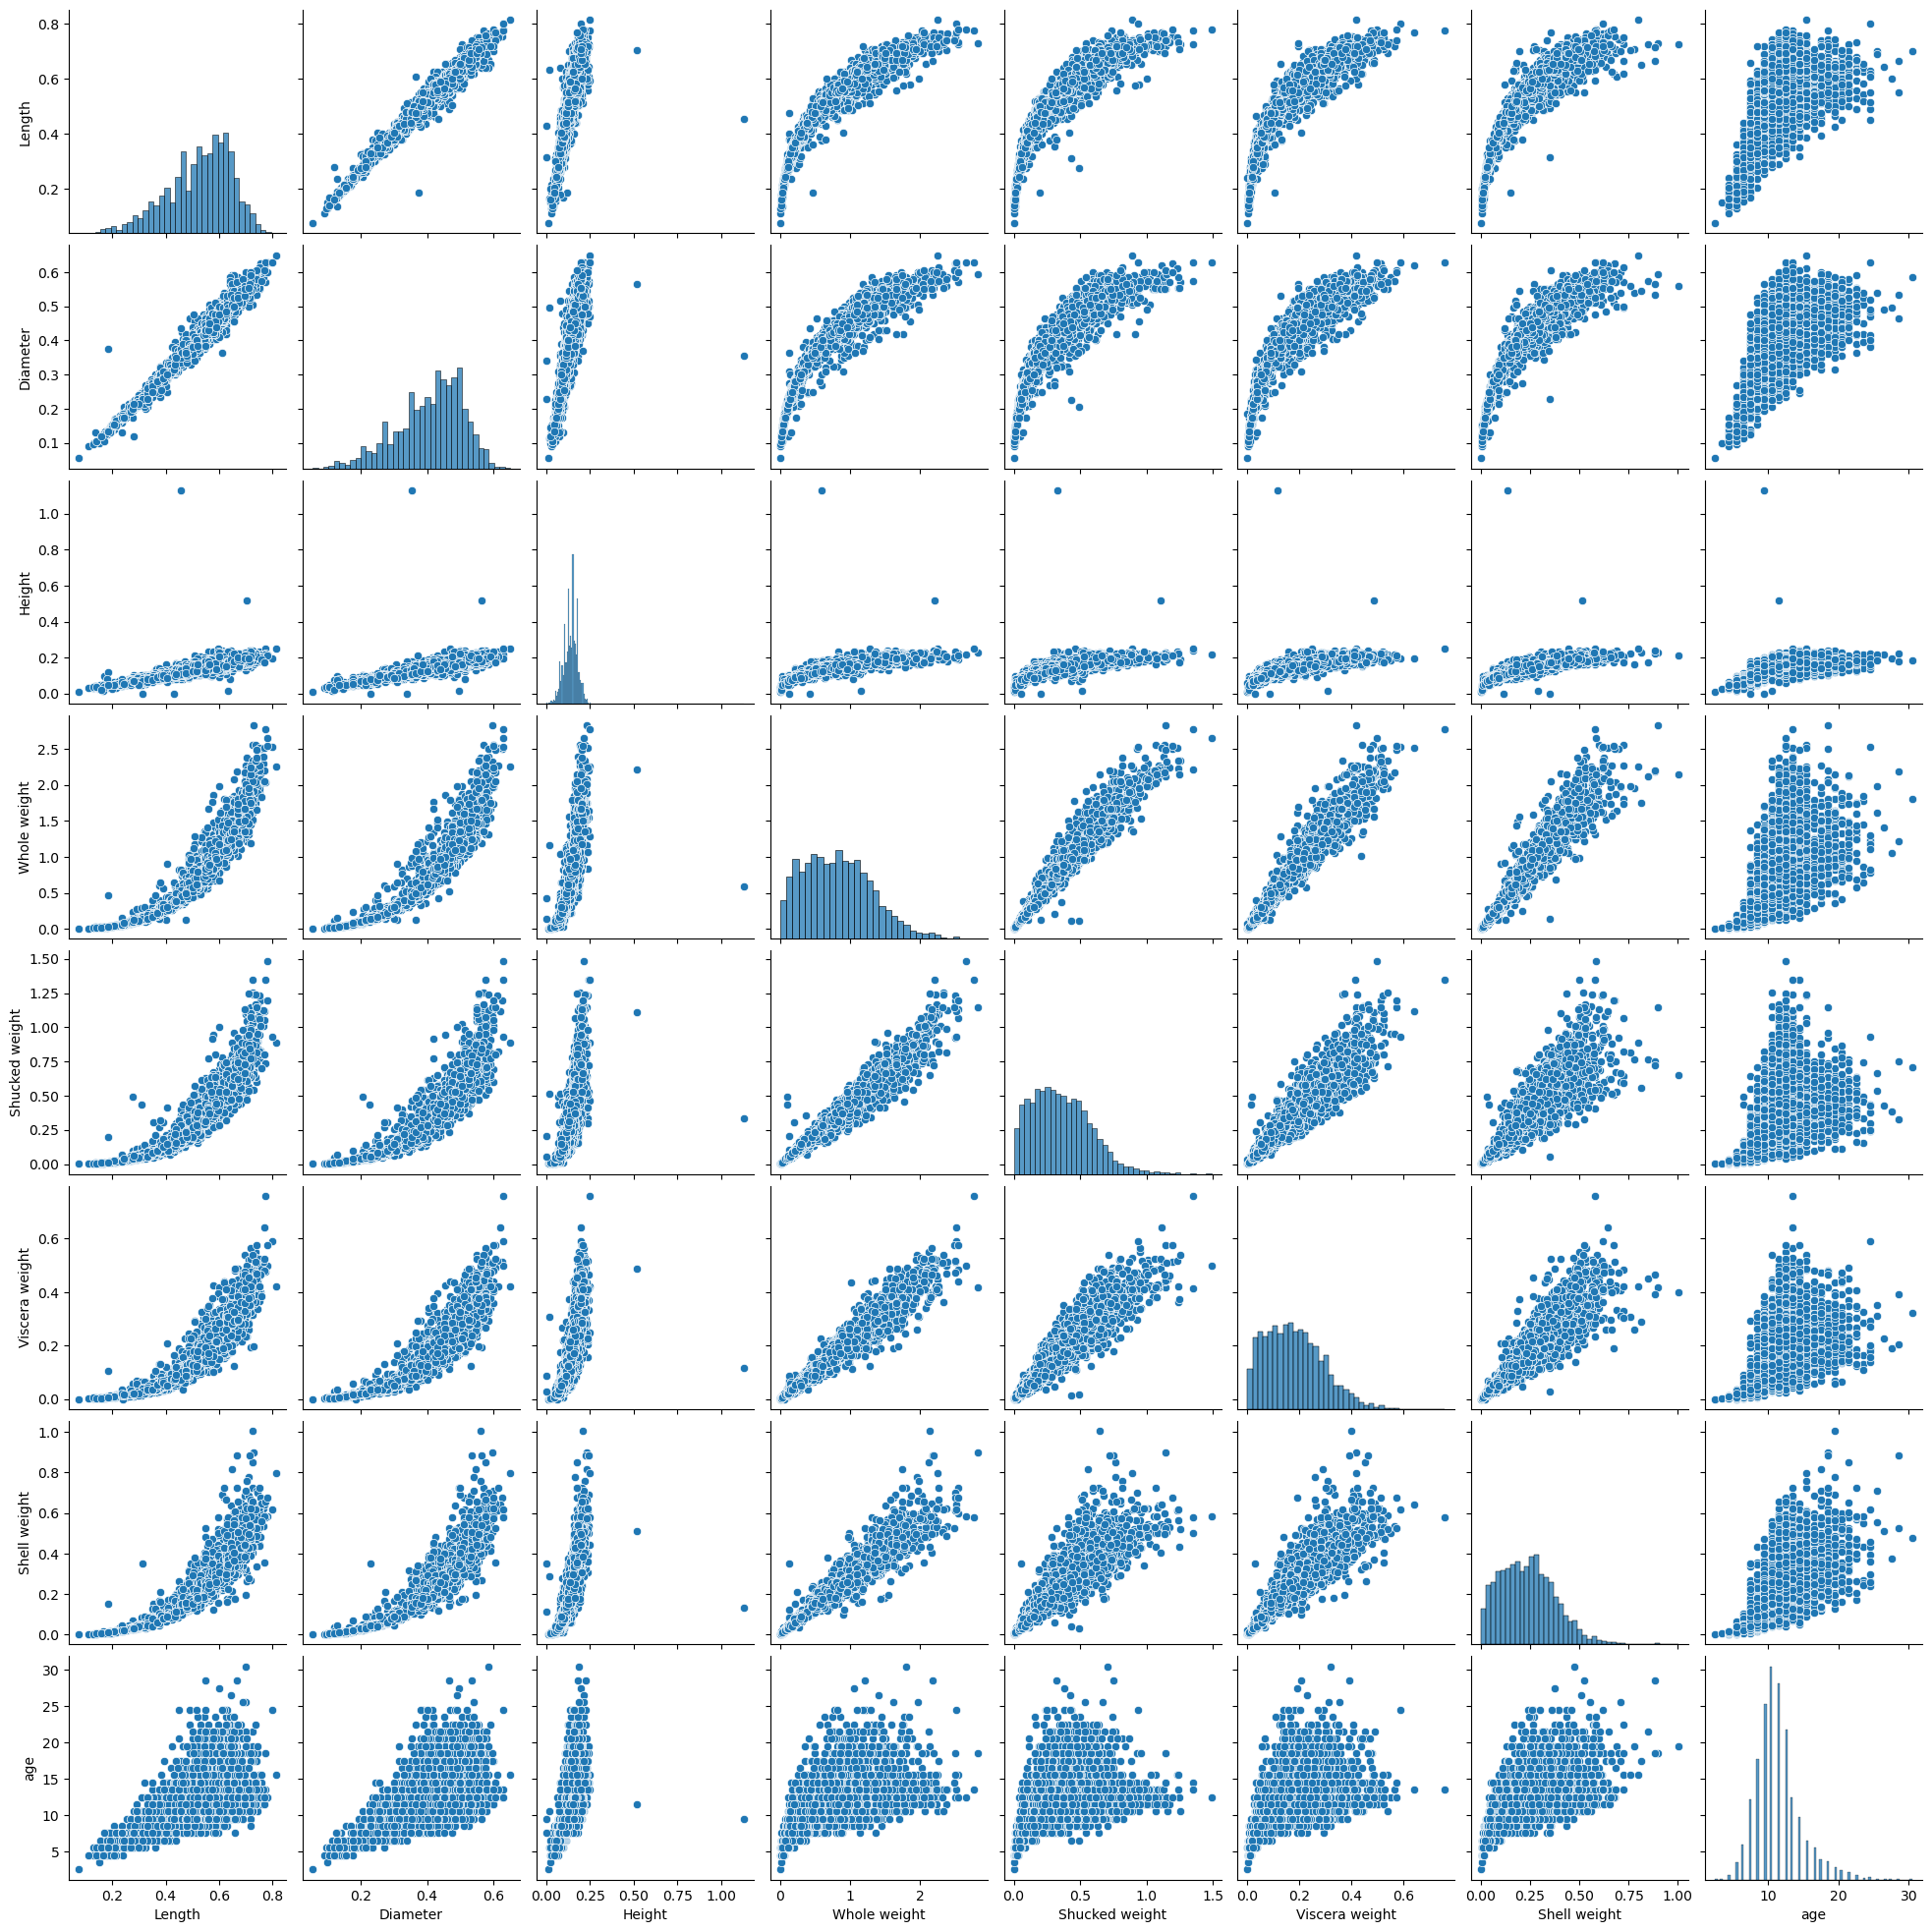

In [63]:
numerical_features = df.select_dtypes(include = [np.number]).columns
sns.pairplot(df[numerical_features])

# 4. Descriptive statistics

In [64]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


# 5. Check for Missing Values

In [65]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

# 6.Outliers Handling

In [66]:
df = pd.get_dummies(df)
dummy_data = df.copy()

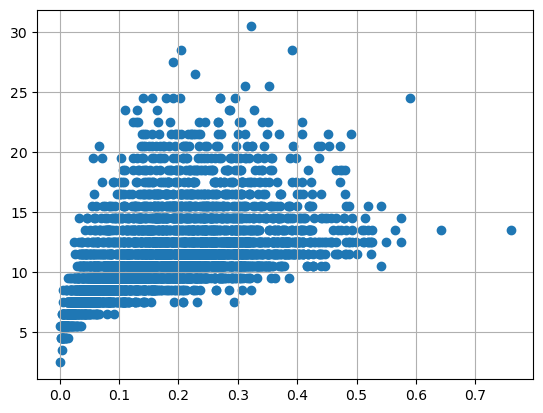

In [67]:
var = 'Viscera weight'
plt.scatter(x = df[var], y = df['age'],)
plt.grid(True)

In [68]:
# outliers removal
df.drop(df[(df['Viscera weight']> 0.5) & (df['age'] < 20)].index, inplace=True)
df.drop(df[(df['Viscera weight']<0.5) & (df['age'] > 25)].index, inplace=True)

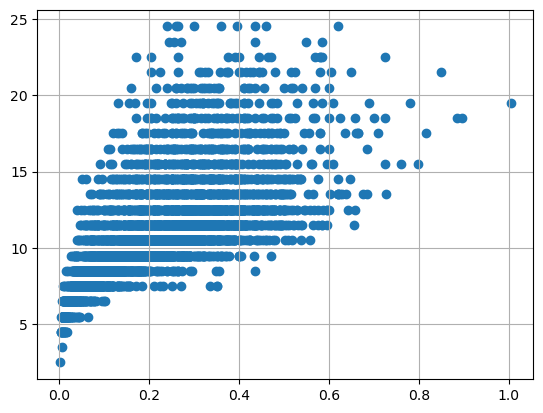

In [69]:
var = 'Shell weight'
plt.scatter(x = df[var], y = df['age'],)
plt.grid(True)
#Outliers removal
df.drop(df[(df['Shell weight']> 0.6) & (df['age'] < 25)].index, inplace=True)
df.drop(df[(df['Shell weight']<0.8) & (df['age'] > 25)].index, inplace=True)

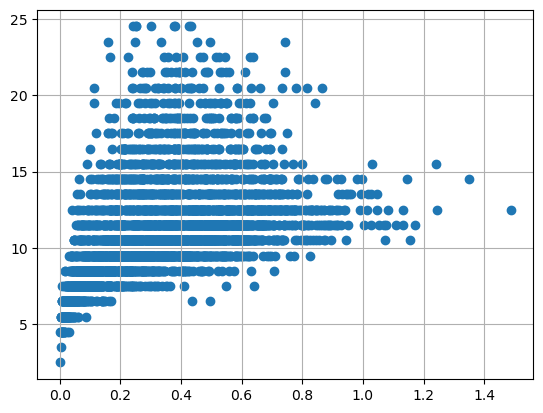

In [70]:
var = 'Shucked weight'
plt.scatter(x = df[var], y = df['age'],)
plt.grid(True)

#Outlier removal
df.drop(df[(df['Shucked weight']>= 1) & (df['age'] < 20)].index, inplace=True)
df.drop(df[(df['Shucked weight']<1) & (df['age'] > 20)].index, inplace=True)

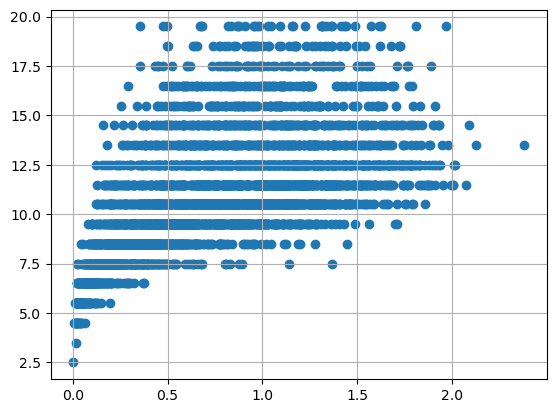

In [71]:
var = 'Whole weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

df.drop(df[(df['Whole weight'] >= 2.5) &
          (df['age'] < 25)].index, inplace = True)
df.drop(df[(df['Whole weight']<2.5) & (
df['age'] > 25)].index, inplace = True)

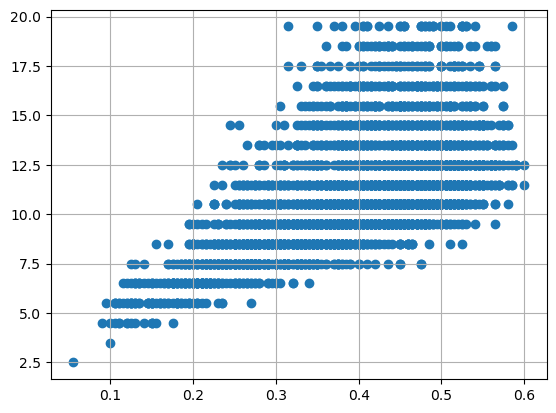

In [72]:
var = 'Diameter'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

df.drop(df[(df['Diameter'] <0.1) &
          (df['age'] < 5)].index, inplace = True)
df.drop(df[(df['Diameter']<0.6) & (
df['age'] > 25)].index, inplace = True)
df.drop(df[(df['Diameter']>=0.6) & (
df['age'] < 25)].index, inplace = True)

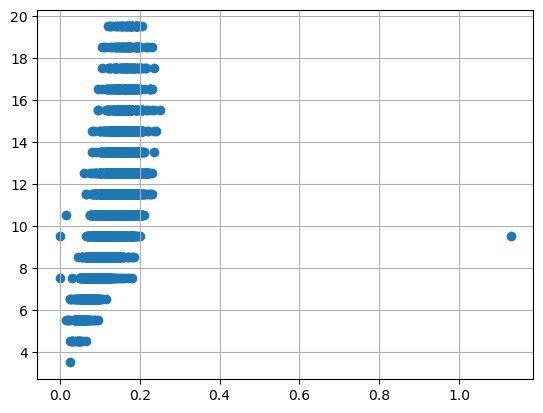

In [73]:
var = 'Height'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)
df.drop(df[(df['Height'] > 0.4) &
          (df['age'] < 15)].index, inplace = True)
df.drop(df[(df['Height']<0.4) & (
df['age'] > 25)].index, inplace = True)

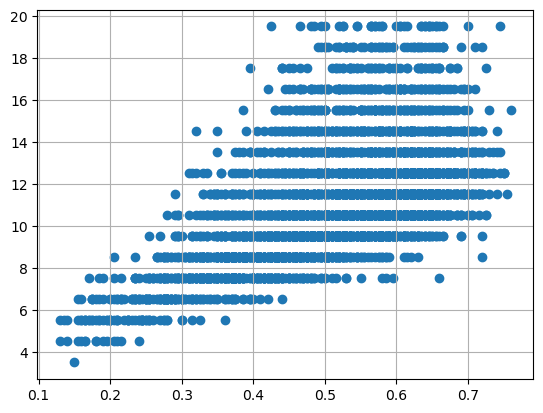

In [74]:
var = 'Length'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

df.drop(df[(df['Length'] <0.1) &
          (df['age'] < 5)].index, inplace = True)
df.drop(df[(df['Length']<0.8) & (
df['age'] > 25)].index, inplace = True)
df.drop(df[(df['Length']>=0.8) & (
df['age'] < 25)].index, inplace = True)

# 7. Categorical columns

In [75]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns

C:\Users\NIYAS N\AppData\Local\Temp\ipykernel_22524\3796453440.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include = [np.object]).columns


In [76]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [77]:
categorical_features

Index([], dtype='object')

# Encoding

In [78]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
print(df.Length.value_counts())

0.575    93
0.625    91
0.580    89
0.550    89
0.620    83
         ..
0.220     2
0.150     1
0.755     1
0.135     1
0.760     1
Name: Length, Length: 126, dtype: int64


# 8. Split the dependent and independent variables

In [79]:
x=df.iloc[:,:5]
x

,Length,Diameter,Height,Whole weight,Shucked weight
0,0.455,0.365,0.095,0.5140,0.2245
1,0.350,0.265,0.090,0.2255,0.0995
2,0.530,0.420,0.135,0.6770,0.2565
3,0.440,0.365,0.125,0.5160,0.2155
4,0.330,0.255,0.080,0.2050,0.0895
...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700
4173,0.590,0.440,0.135,0.9660,0.4390
4174,0.600,0.475,0.205,1.1760,0.5255
4175,0.625,0.485,0.150,1.0945,0.5310


In [80]:
y=df.iloc[:,5:]
y

,Viscera weight,Shell weight,age,Sex_F,Sex_I,Sex_M
0,0.1010,0.1500,16.5,0,0,1
1,0.0485,0.0700,8.5,0,0,1
2,0.1415,0.2100,10.5,1,0,0
3,0.1140,0.1550,11.5,0,0,1
4,0.0395,0.0550,8.5,0,1,0
...,...,...,...,...,...,...
4172,0.2390,0.2490,12.5,1,0,0
4173,0.2145,0.2605,11.5,0,0,1
4174,0.2875,0.3080,10.5,0,0,1
4175,0.2610,0.2960,11.5,1,0,0


# 9. Feature Scaling

In [81]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)

In [82]:
mlrpred=mlr.predict(x_test[0:9])

In [83]:
mlrpred

array([[ 0.12136693,  0.15710789, 10.15109156,  0.20884585,  0.51932425,
         0.2718299 ],
       [ 0.0409468 ,  0.05203084,  8.29007627,  0.06023324,  0.78247445,
         0.15729232],
       [ 0.13567019,  0.2140895 , 12.77692571,  0.36109842,  0.27865277,
         0.3602488 ],
       [ 0.21387942,  0.28729261, 12.23996412,  0.3966989 ,  0.19624432,
         0.40705677],
       [ 0.25049699,  0.32969489, 12.98746242,  0.44150681,  0.07771499,
         0.4807782 ],
       [ 0.04414554,  0.06261787,  8.64277693,  0.0901178 ,  0.70754519,
         0.20233701],
       [ 0.02631654,  0.03607348,  8.02278495,  0.04276412,  0.77726795,
         0.17996793],
       [ 0.19258283,  0.2360222 ,  9.91430866,  0.28454504,  0.23963978,
         0.47581518],
       [ 0.09872416,  0.13389794,  9.688783  ,  0.19097732,  0.53118109,
         0.27784159]])

# 10.Spliting the data into training and testing

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# 11. Model building

In [85]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

# 12 & 13. Train and Test the model

In [86]:
x_test[0:5]

,Length,Diameter,Height,Whole weight,Shucked weight
1940,0.625,0.520,0.18,1.3540,0.4845
2703,0.680,0.530,0.18,1.5290,0.7635
3042,0.575,0.430,0.13,0.7425,0.2895
3875,0.295,0.225,0.09,0.1385,0.0480
1553,0.390,0.290,0.10,0.2225,0.0950


In [87]:
y_test[0:5]

,Viscera weight,Shell weight,age,Sex_F,Sex_I,Sex_M
1940,0.3510,0.3750,12.5,1,0,0
2703,0.3115,0.4025,12.5,0,0,1
3042,0.2005,0.2200,9.5,0,1,0
3875,0.0460,0.0500,10.5,0,0,1
1553,0.0465,0.0730,8.5,0,1,0


# 14. Measure the performance using metrics

In [89]:
from sklearn.metrics import r2_score
r2_score(mlr.predict(x_test),y_test)

-3.169050041203365